### 베르누이 확률분포
- 기댓값 $E[X] = \mu$
- 분산 $Var[X] = \mu(1 - \mu)$ 

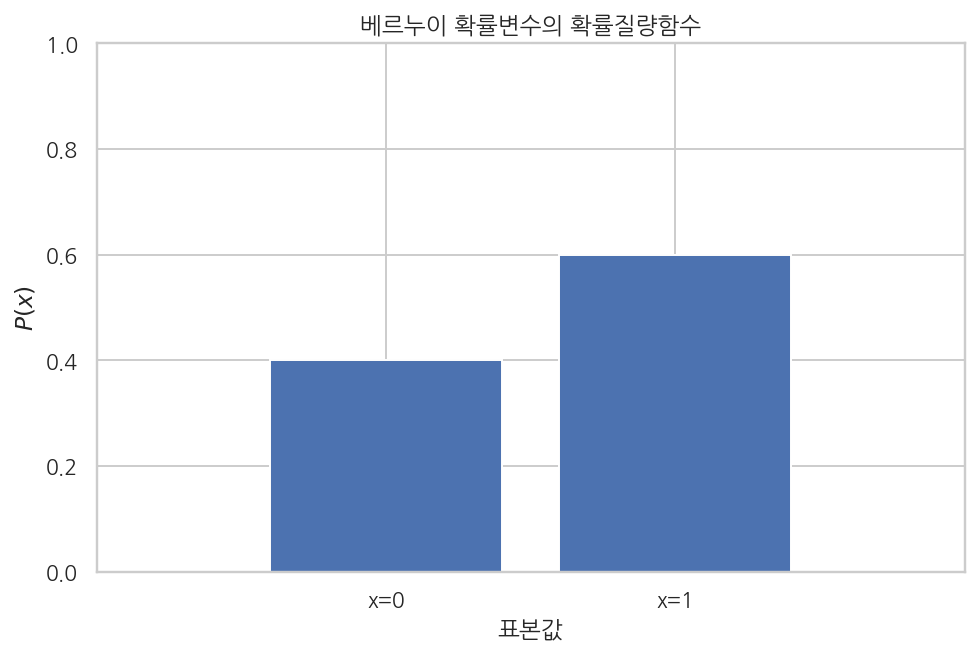

In [9]:
mu = 0.6
rv = sp.stats.bernoulli(mu)

xx = [0, 1]
plt.subplots(dpi=70)
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ['x=0', 'x=1'])
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('베르누이 확률변수의 확률질량함수')
plt.show()

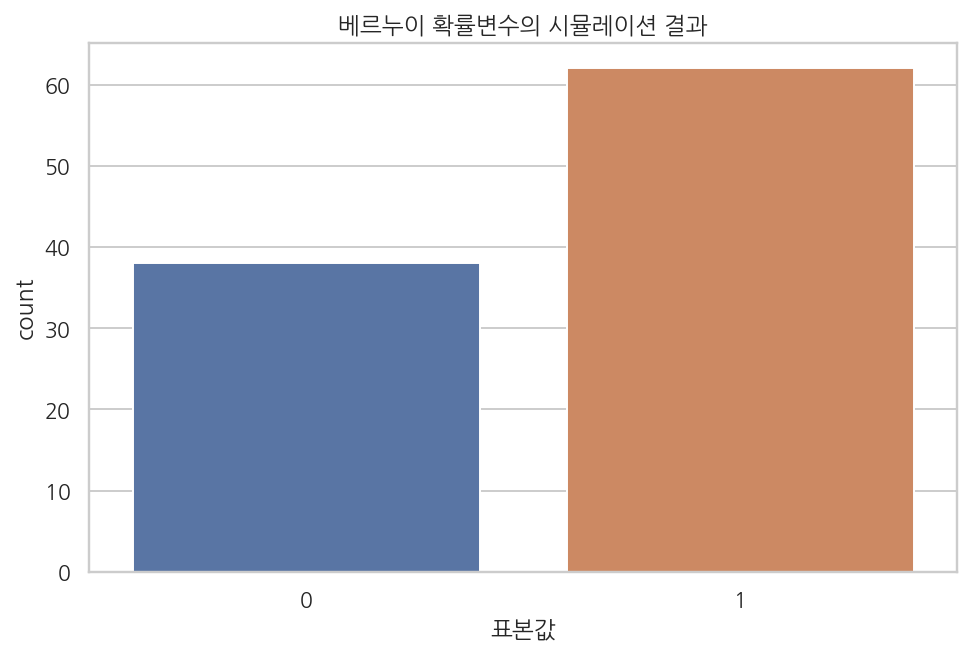

In [2]:
# 표본 100개 생성(시뮬레이션)
x = rv.rvs(100, random_state=0)

plt.subplots(dpi=70)
sns.countplot(x)
plt.title('베르누이 확률변수의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.show()

In [3]:
# 이론적인 확률분포와 비교
y = np.bincount(x, minlength=2) / float(len(x))
df = pd.DataFrame({'이론': rv.pmf(xx), '시뮬레이션': y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [4]:
df2 = df.stack().reset_index()
df2.columns = ['표본값', '유형', '비율']
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


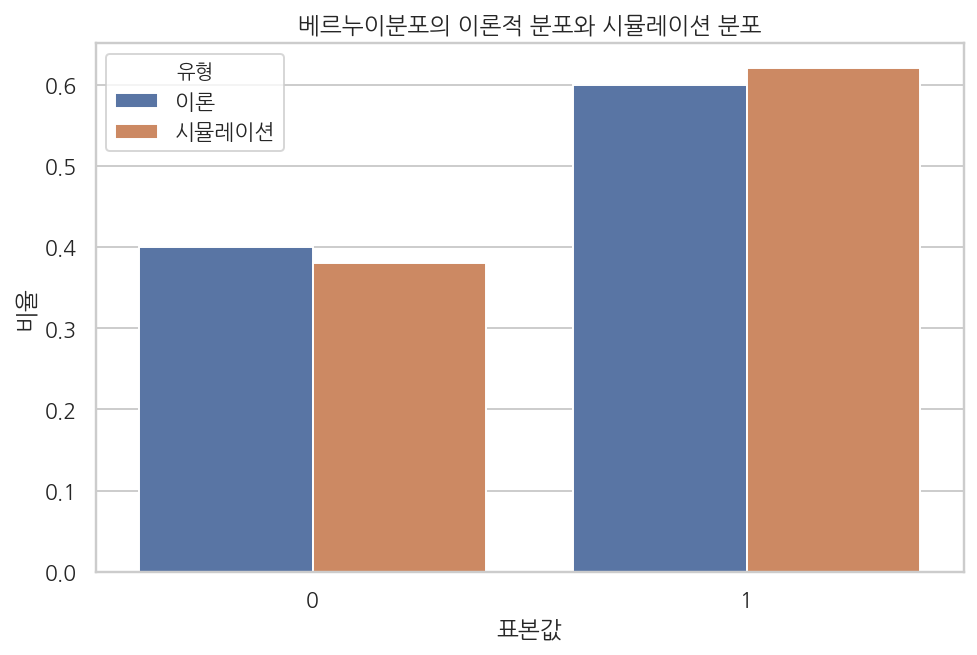

In [6]:
plt.subplots(dpi=70)
sns.barplot(x='표본값', y='비율', hue='유형', data=df2)
plt.title('베르누이분포의 이론적 분포와 시뮬레이션 분포')
plt.show()

### 이항분포
- 기댓값 $E[X] = N\mu$
- 분산 $Var[X] = N\mu(1 - \mu)$ 

In [11]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

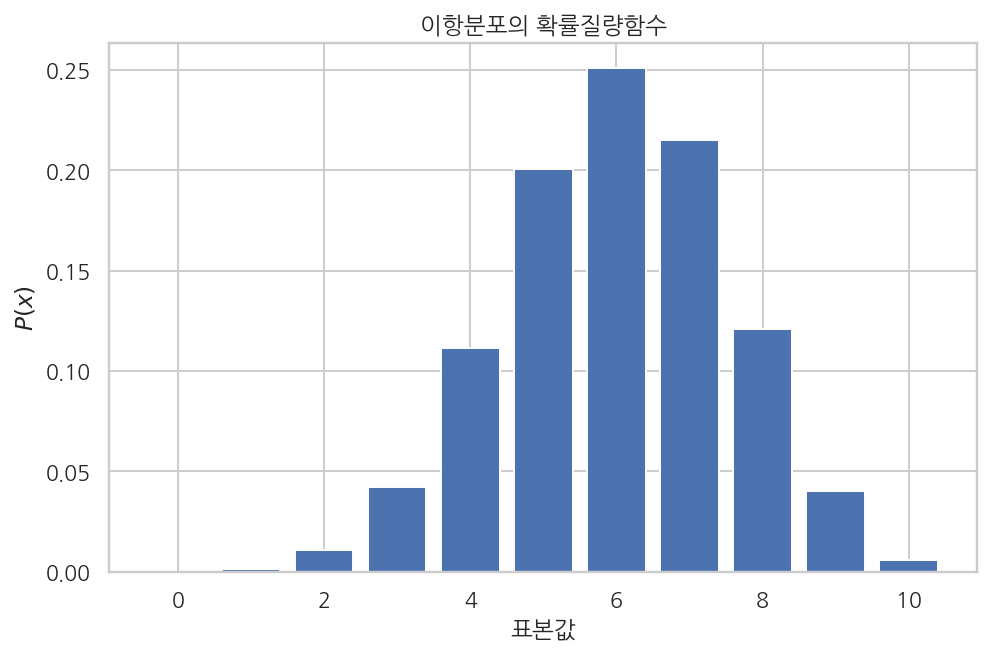

In [12]:
xx = np.arange(N + 1)
plt.subplots(dpi=70)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('이항분포의 확률질량함수')
plt.show()

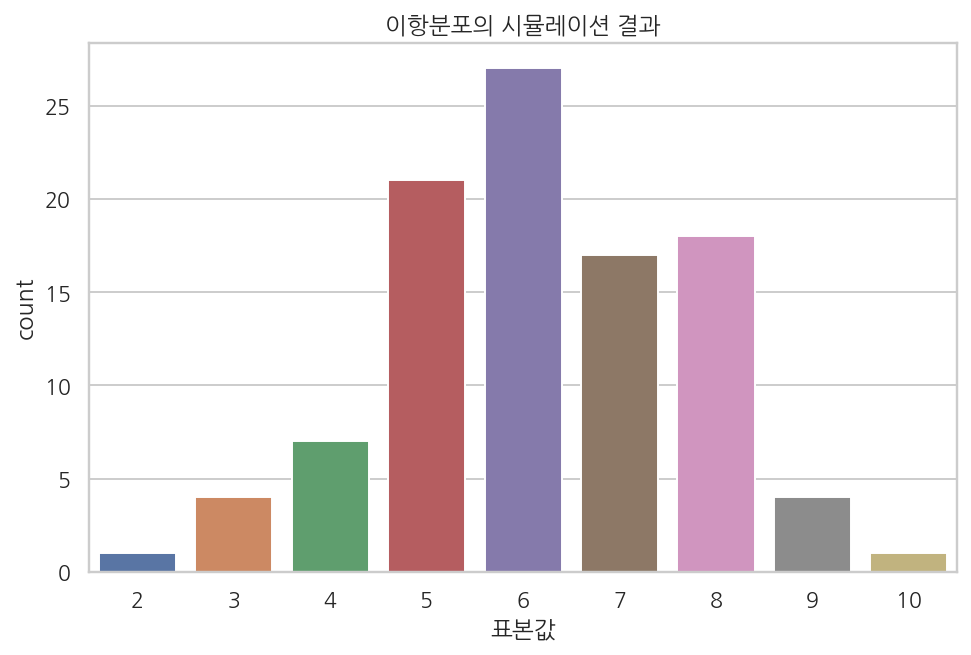

In [14]:
# 시뮬레이션
np.random.seed(0)
x = rv.rvs(100)

plt.subplots(dpi=70)
sns.countplot(x)
plt.title('이항분포의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.show()

In [15]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({'이론': rv.pmf(xx), '시뮬레이션': y}).stack().reset_index()
df.columns = ['표본값', '유형', '비율']
df.pivot('표본값', '유형', '비율')
df

,표본값,유형,비율
0,0,이론,0.000105
1,0,시뮬레이션,0.000000
2,1,이론,0.001573
3,1,시뮬레이션,0.000000
4,2,이론,0.010617
5,2,시뮬레이션,0.010000
6,3,이론,0.042467
7,3,시뮬레이션,0.040000
8,4,이론,0.111477
9,4,시뮬레이션,0.070000


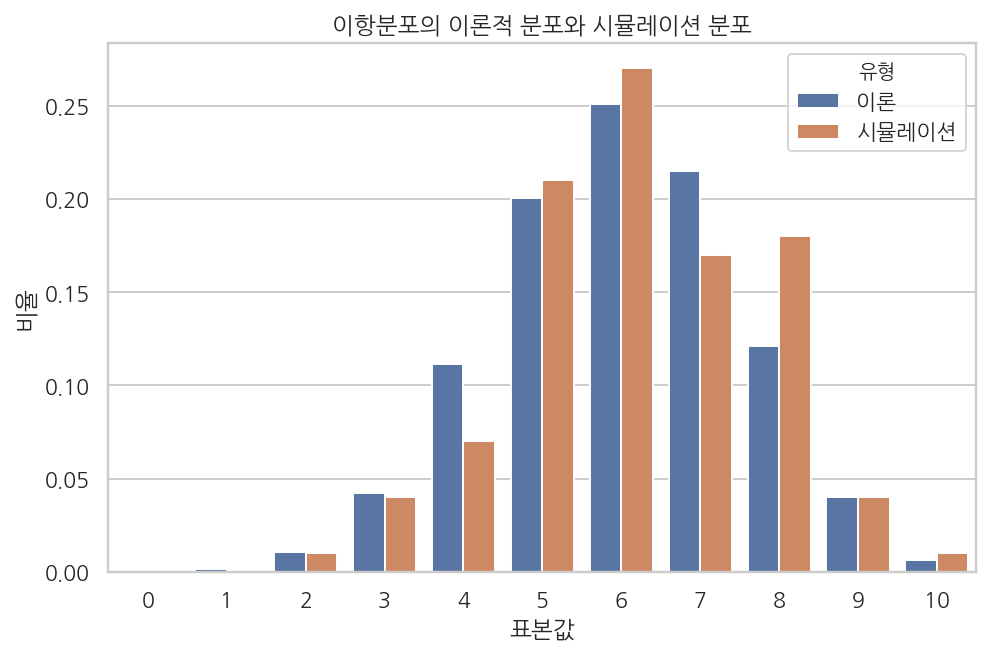

In [16]:
plt.subplots(dpi=70)
sns.barplot(x='표본값', y='비율', hue='유형', data=df)
plt.title('이항분포의 이론적 분포와 시뮬레이션 분포')
plt.show()

### 카테고리분포
- 기댓값 $E[x_k] = \mu_k$
- 분산 $Var[x_k] = \mu_k(1 - \mu_k)$ 

In [17]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

In [18]:
# 원 핫 인코딩
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


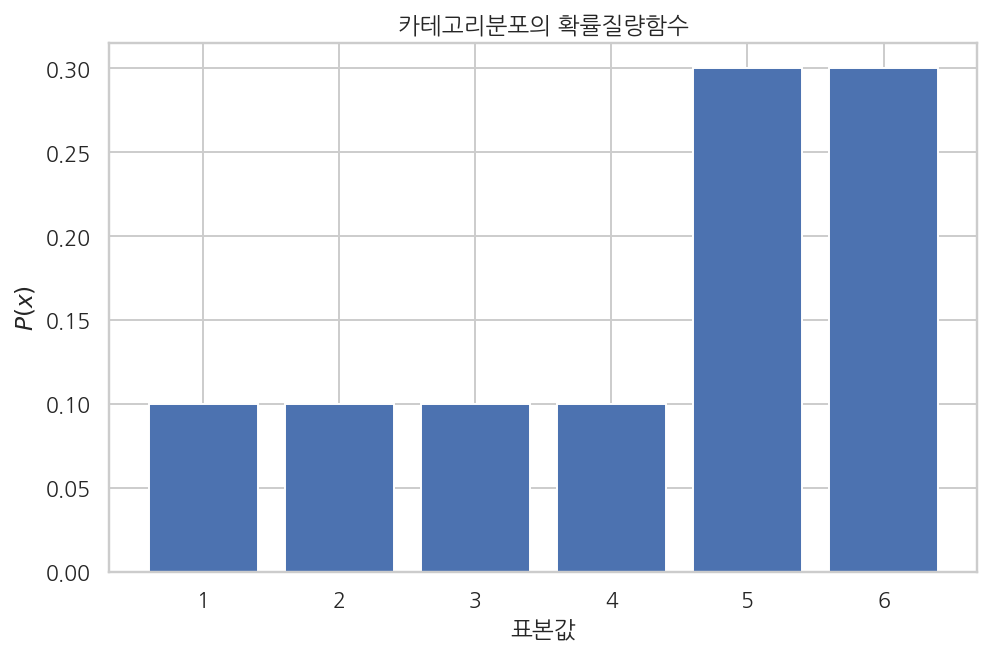

In [20]:
plt.subplots(dpi=70)
plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel('$P(x)$')
plt.xlabel('표본값')
plt.title('카테고리분포의 확률질량함수')
plt.show()

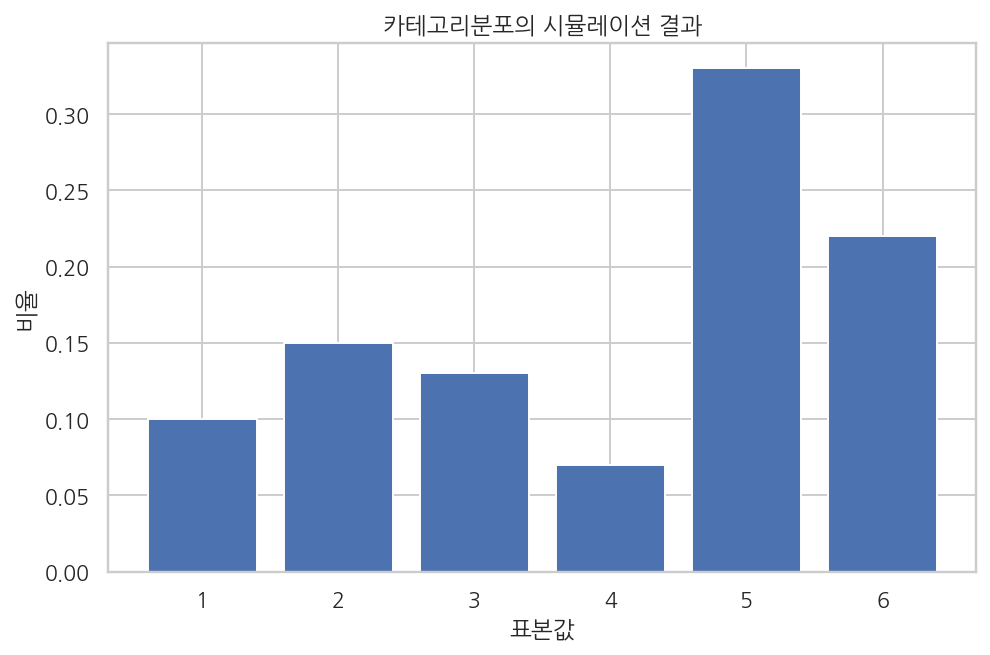

In [23]:
np.random.seed(1)
X = rv.rvs(100)  # 원 핫 인코딩 벡터
y = X.sum(axis=0)/float(len(X))
plt.subplots(dpi=70)
plt.bar(np.arange(1, 7), y)
plt.title('카테고리분포의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.ylabel('비율')
plt.show()

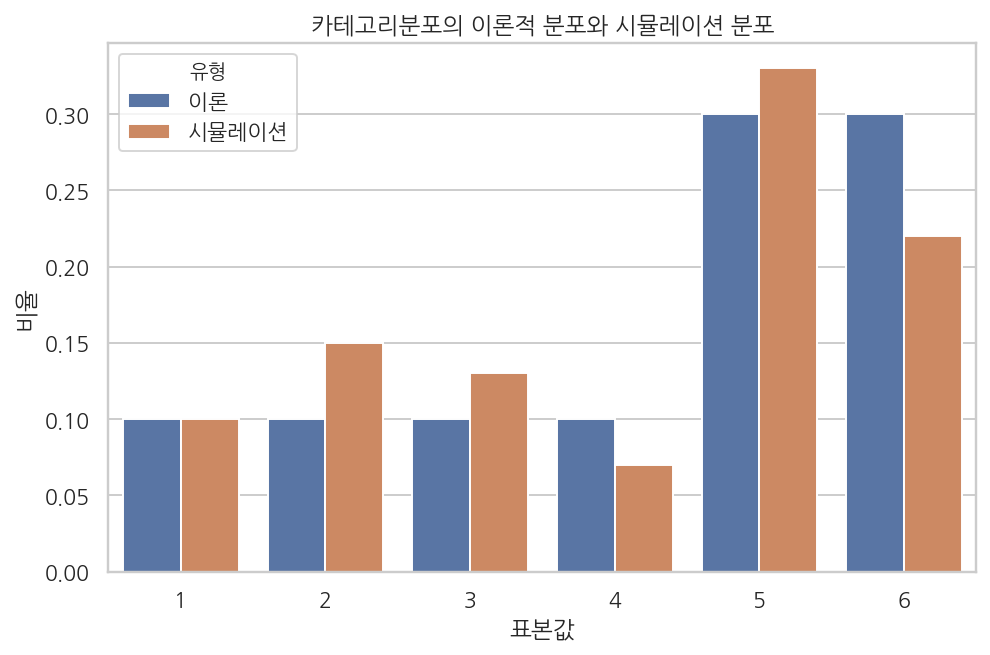

In [24]:
df = pd.DataFrame({'이론': rv.pmf(xx_ohe.values), '시뮬레이션': y},
                  index=np.arange(1, 7)).stack().reset_index()
df.columns = ['표본값', '유형', '비율']
df.pivot('표본값', '유형', '비율')

plt.subplots(dpi=70)
sns.barplot(x='표본값', y='비율', hue='유형', data=df)
plt.title('카테고리분포의 이론적 분포와 시뮬레이션 분포')
plt.show()

#### 다중분류문제

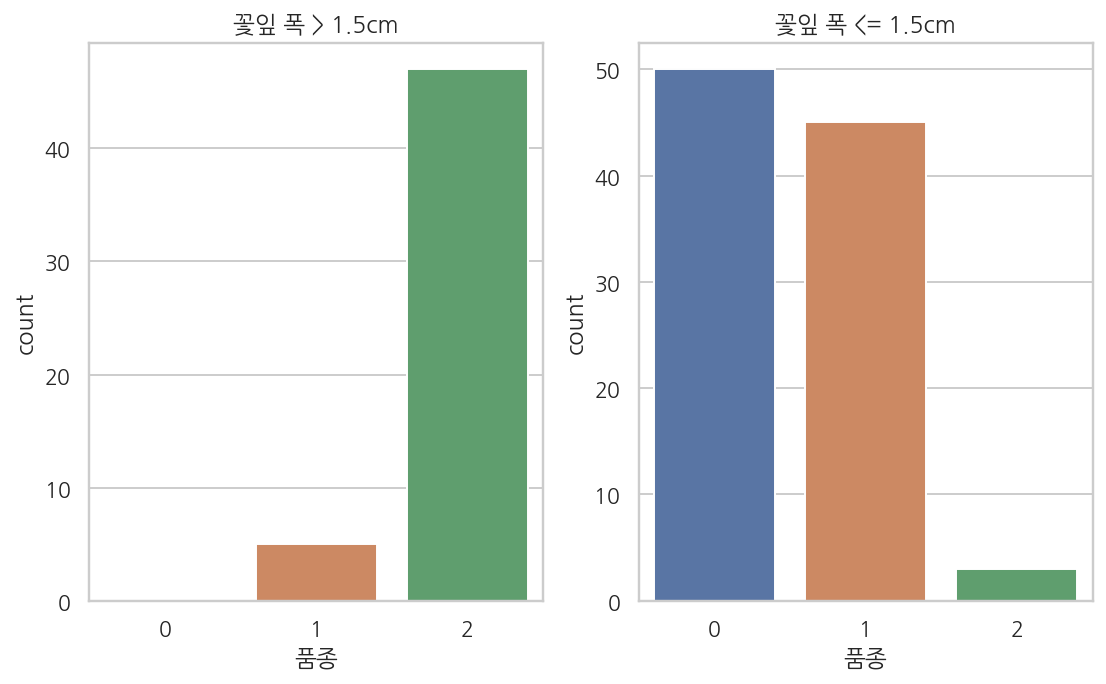

In [32]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['품종'] = pd.Series(iris.target, dtype='category')
df1 = df[df['petal width (cm)'] > 1.5]
df2 = df[df['petal width (cm)'] <= 1.5]

fig, ax = plt.subplots(1, 2, dpi=70)
sns.countplot(x='품종', data=df1, ax=ax[0]).set_title('꽃잎 폭 > 1.5cm')
sns.countplot(x='품종', data=df2, ax=ax[1]).set_title('꽃잎 폭 <= 1.5cm')
plt.tight_layout()
plt.show()

### 다항분포
- 기댓값 $E[x_k] = N\mu_k$
- 분산 $Var[x_k] = N\mu_k(1 - \mu_k)$ 

In [36]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)
np.random.seed(0)
X = rv.rvs(100)
X[:5]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9]])

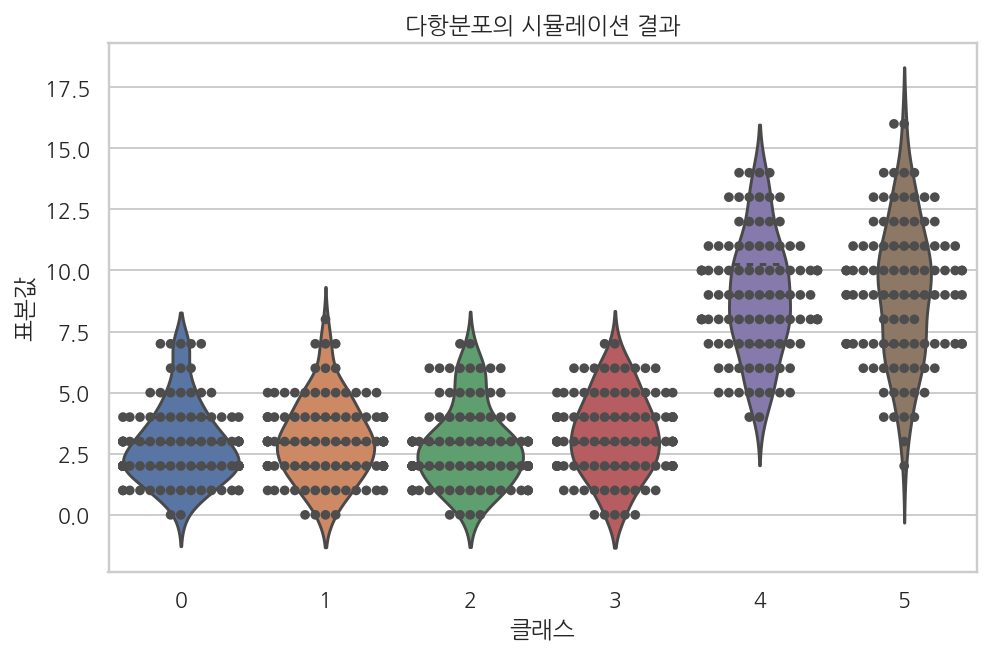

In [37]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ['시도', '클래스', '표본값']

plt.subplots(dpi=70)
sns.violinplot(x='클래스', y='표본값', data=df, inner='quartile')
sns.swarmplot(x='클래스', y='표본값', data=df, color='.3')
plt.title('다항분포의 시뮬레이션 결과')
plt.show()

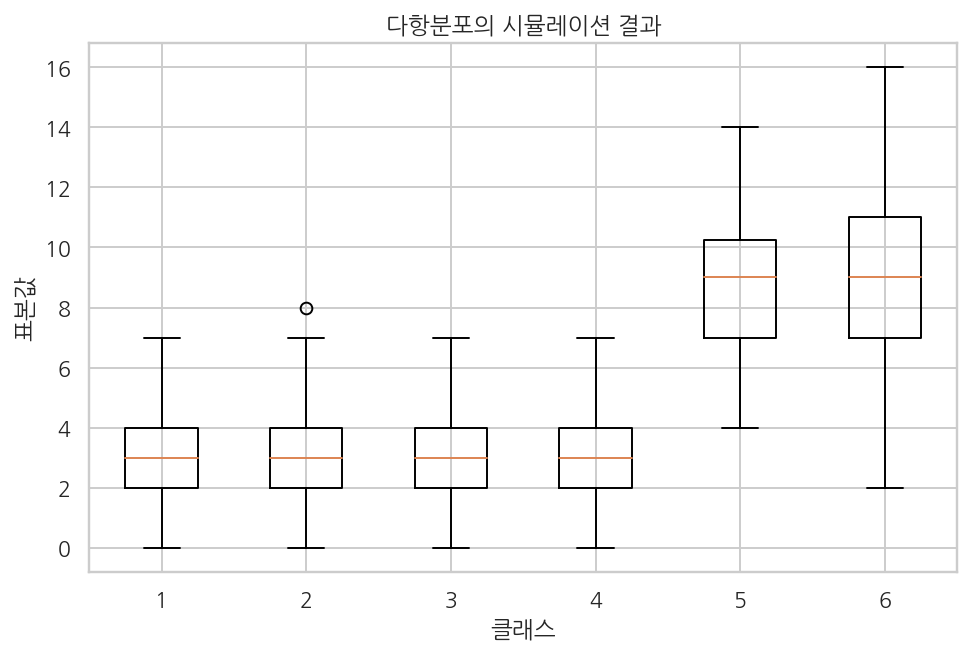

In [38]:
plt.subplots(dpi=70)
plt.boxplot(X)
plt.title('다항분포의 시뮬레이션 결과')
plt.xlabel('클래스')
plt.ylabel('표본값')
plt.show()

### 정규분포와 중심극한정리

In [39]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

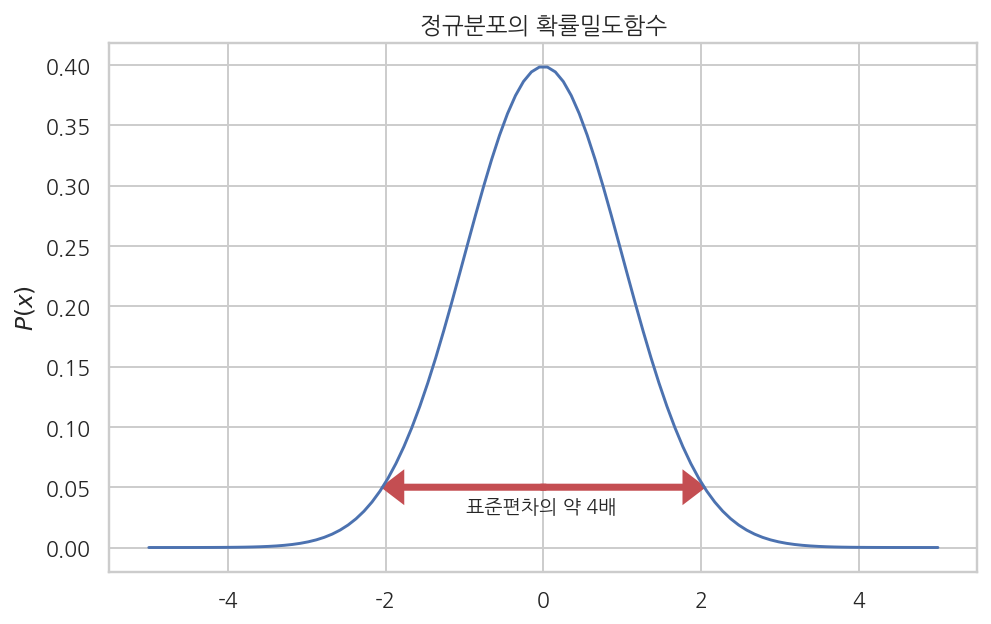

In [46]:
xx = np.linspace(-5, 5, 100)
plt.subplots(dpi=70)
plt.plot(xx, rv.pdf(xx))
plt.arrow(0, 0.05, 2, 0, lw=3, color='r', head_width=0.02,
          head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r', head_width=0.02,
          head_length=0.2, length_includes_head=True)

plt.text(-.98, .03, '표준편차의 약 4배')
plt.ylabel('$P(x)$')
plt.title('정규분포의 확률밀도함수')
plt.show()

In [42]:
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

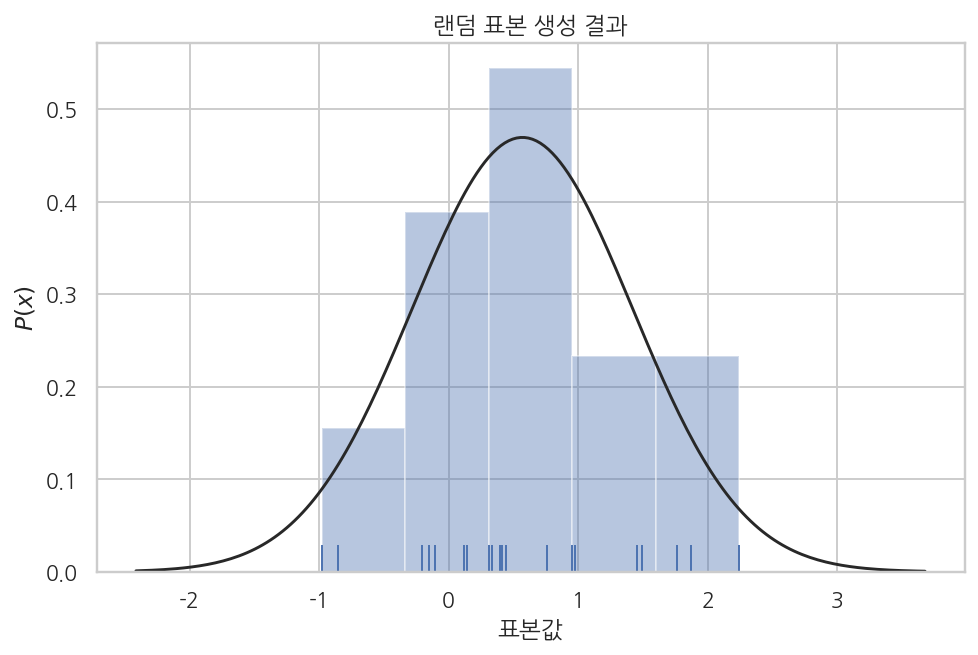

In [47]:
plt.subplots(dpi=70)
sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.show()

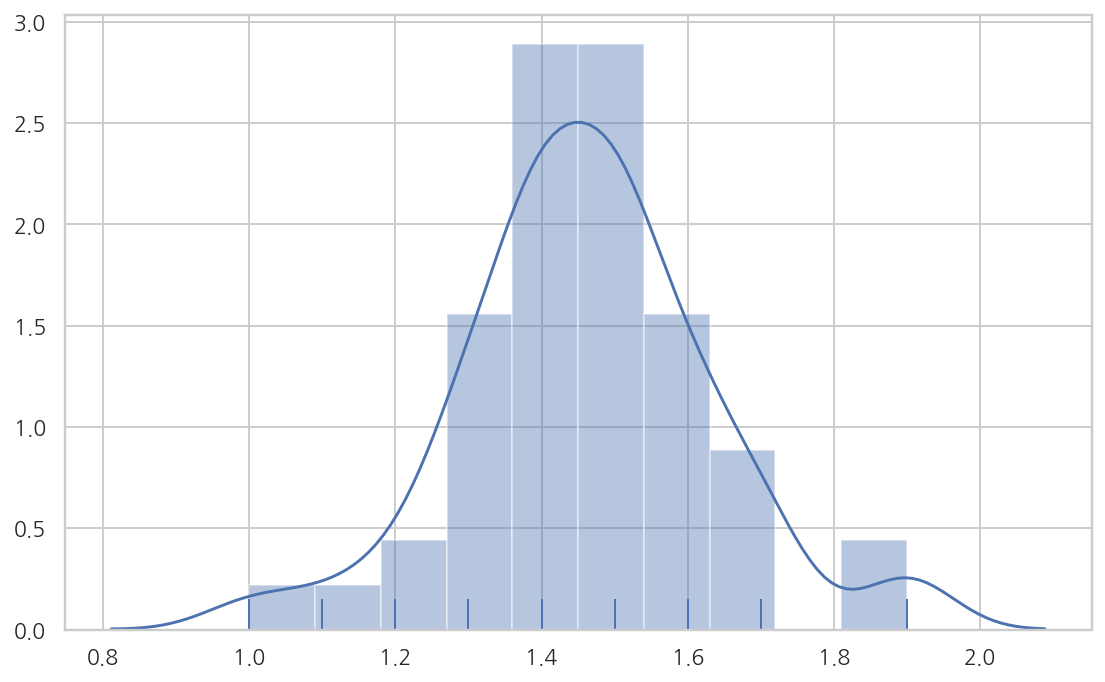

In [48]:
setosa_sepal_length = datasets.load_iris().data[:50, 2]
plt.subplots(dpi=70)
sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.show()

#### 중심극한정리

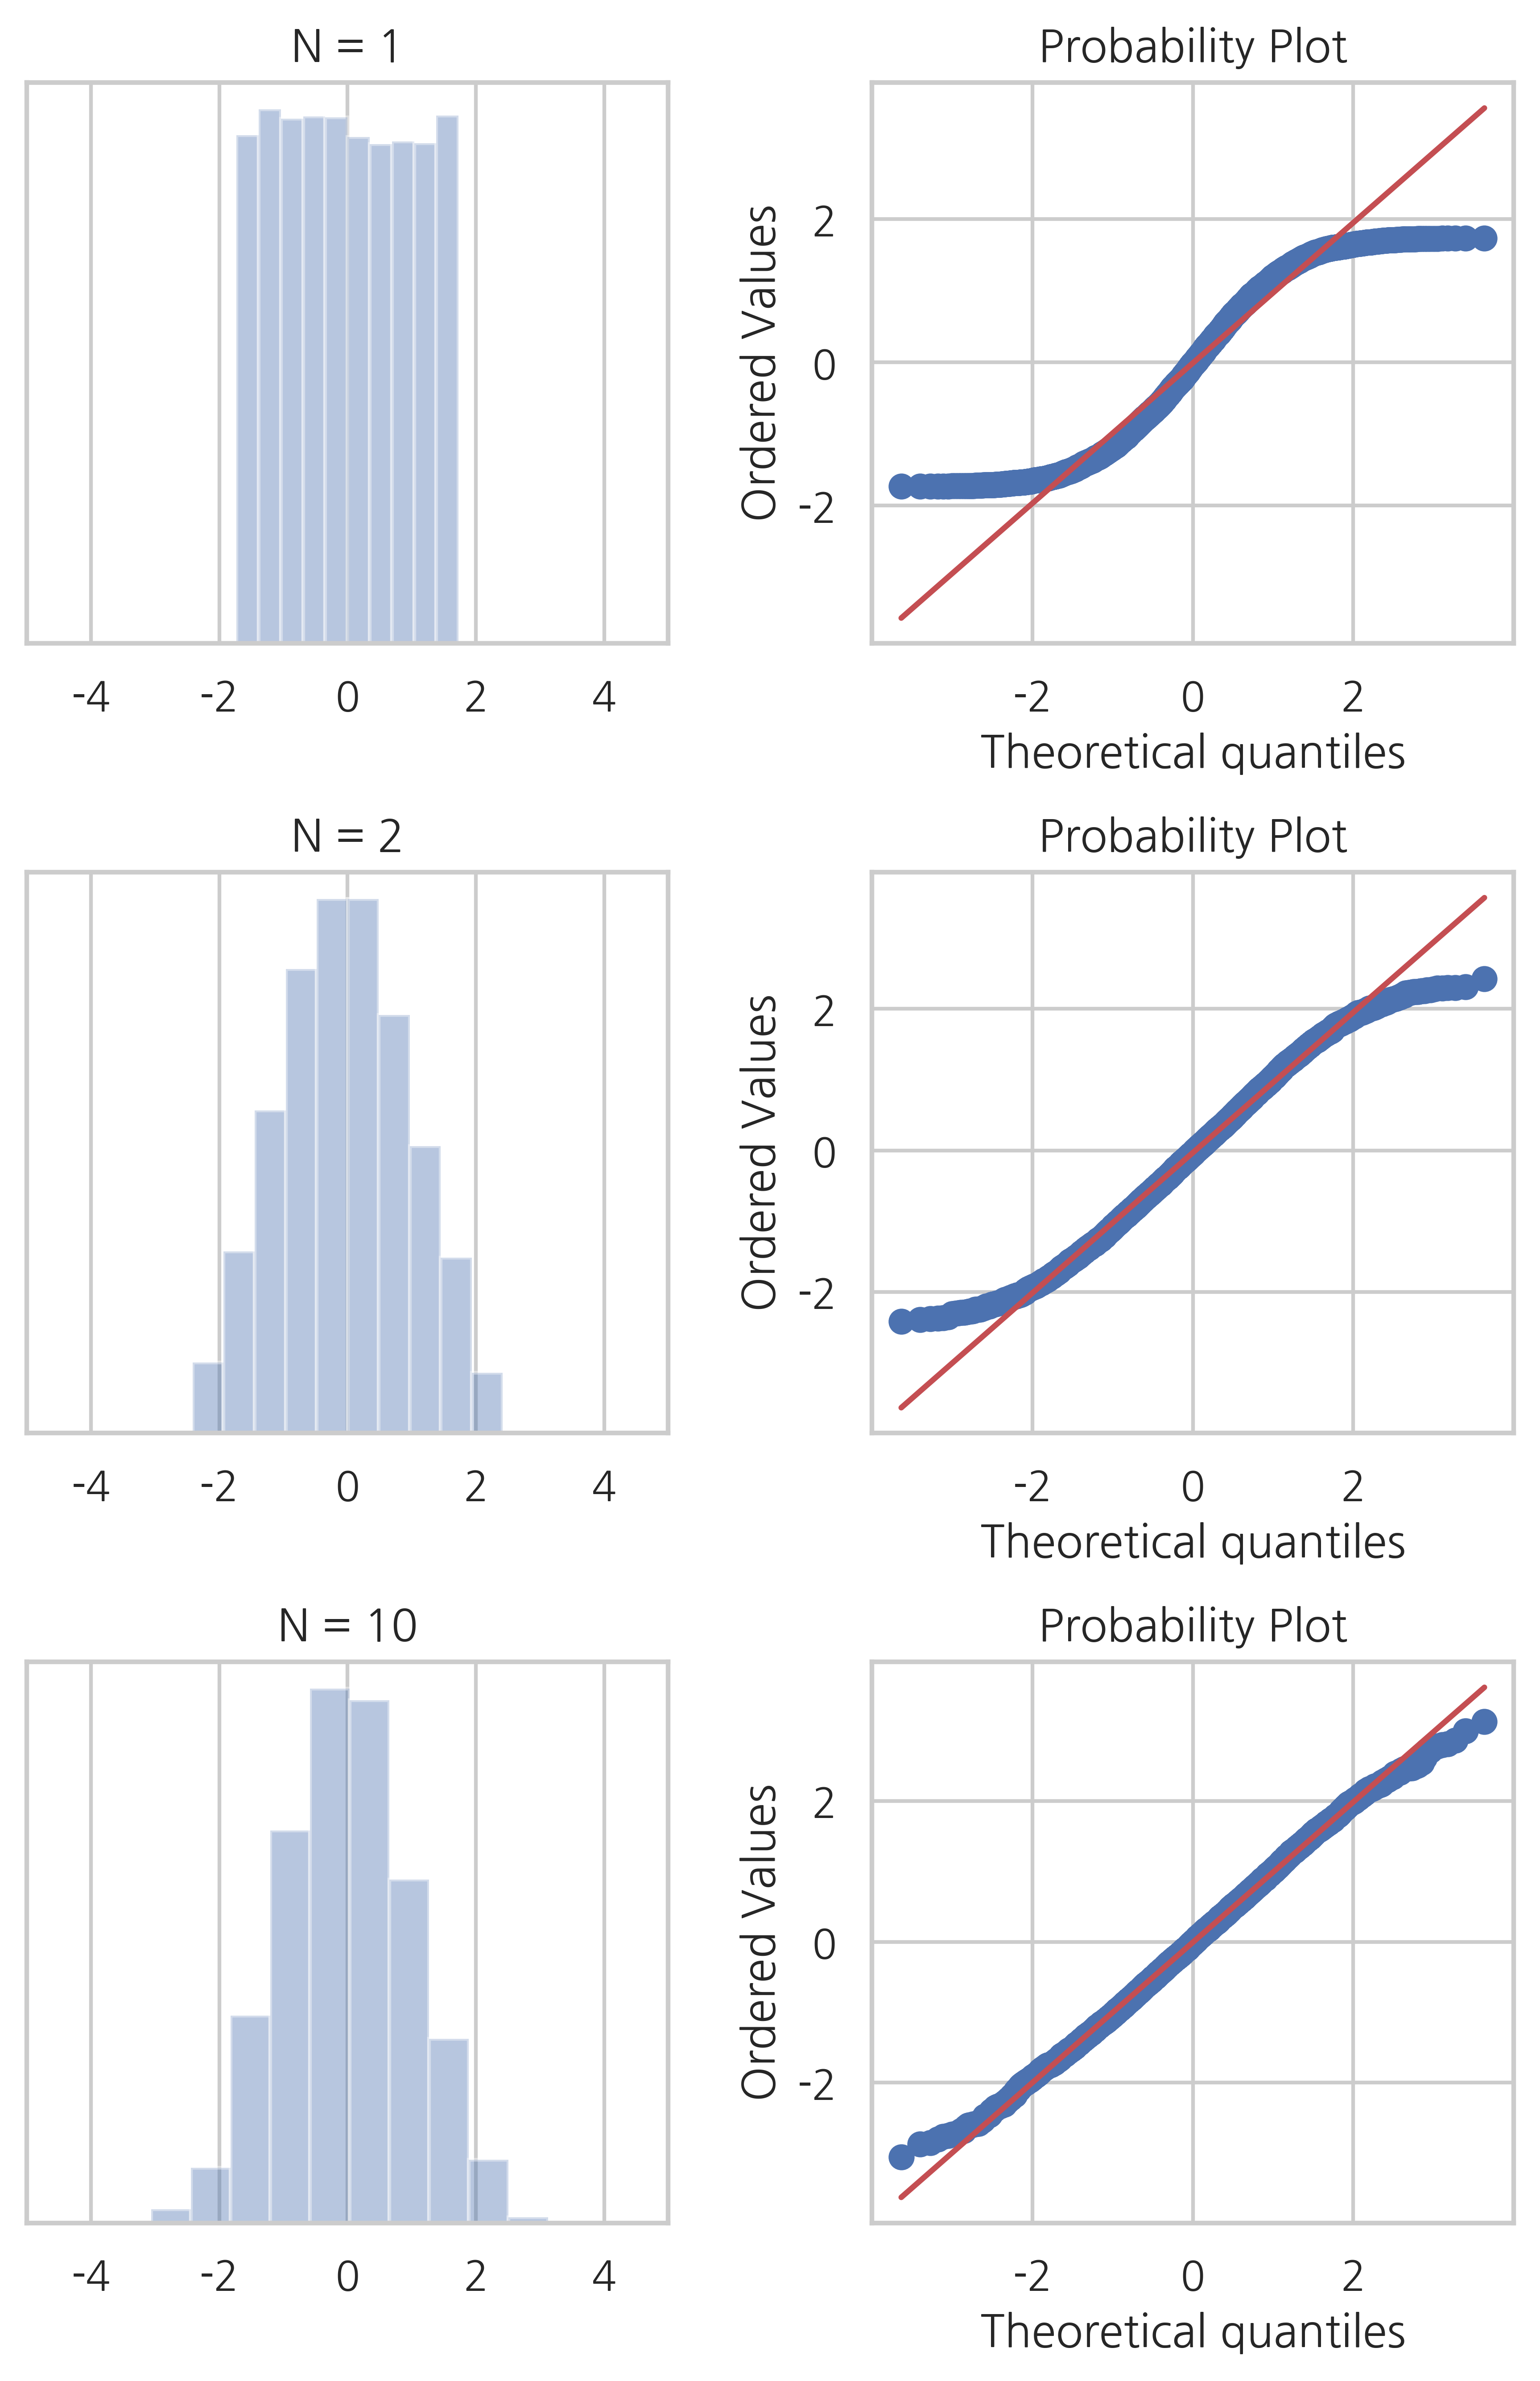

In [55]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()

### 스튜던트 t분포
### 카이제곱분포
### F분포
### 다변수정규분포
### 베타분포, 감마분포, 디리클레분포